In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive/colab_projects/parrot_rl/nbs/

/content/gdrive/MyDrive/colab_projects/parrot_rl/nbs


In [ ]:
import sys

In [ ]:
sys.path.append("../src/")

In [ ]:
!ls ../src/

density_estimation.py  __pycache__


In [ ]:
from density_estimation import fit_model_density_estimation

In [ ]:
from sklearn.datasets import make_moons,  make_s_curve
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras import layers

In [ ]:
data = make_s_curve(3000, noise=0.05)[0].astype("float32")
data = data[:, :2]
norm = layers.experimental.preprocessing.Normalization()
norm.adapt(data)
normalized_data = norm(data)

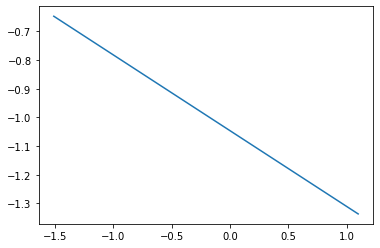

In [ ]:
plt.plot(normalized_data.numpy()[0], normalized_data.numpy()[1])

In [ ]:
model, h = fit_model_density_estimation(normalized_data=normalized_data)

Epoch 1/300
47/47 - 4s - loss: 2.8457
Epoch 2/300
47/47 - 1s - loss: 2.8384
Epoch 3/300
47/47 - 1s - loss: 2.8111
Epoch 4/300
47/47 - 1s - loss: 2.6564
Epoch 5/300
47/47 - 1s - loss: 2.5539
Epoch 6/300
47/47 - 1s - loss: 2.4924
Epoch 7/300
47/47 - 1s - loss: 2.4742
Epoch 8/300
47/47 - 1s - loss: 2.4754
Epoch 9/300
47/47 - 1s - loss: 2.4611
Epoch 10/300
47/47 - 1s - loss: 2.4537
Epoch 11/300
47/47 - 1s - loss: 2.4351
Epoch 12/300
47/47 - 1s - loss: 2.4346
Epoch 13/300
47/47 - 1s - loss: 2.4405
Epoch 14/300
47/47 - 1s - loss: 2.4221
Epoch 15/300
47/47 - 1s - loss: 2.4404
Epoch 16/300
47/47 - 1s - loss: 2.4232
Epoch 17/300
47/47 - 1s - loss: 2.4200
Epoch 18/300
47/47 - 1s - loss: 2.4450
Epoch 19/300
47/47 - 1s - loss: 2.4294
Epoch 20/300
47/47 - 1s - loss: 2.4205
Epoch 21/300
47/47 - 1s - loss: 2.4117
Epoch 22/300
47/47 - 1s - loss: 2.4244
Epoch 23/300
47/47 - 1s - loss: 2.4219
Epoch 24/300
47/47 - 1s - loss: 2.4164
Epoch 25/300
47/47 - 1s - loss: 2.4140
Epoch 26/300
47/47 - 1s - loss: 2.

(-2.0, 2.0)

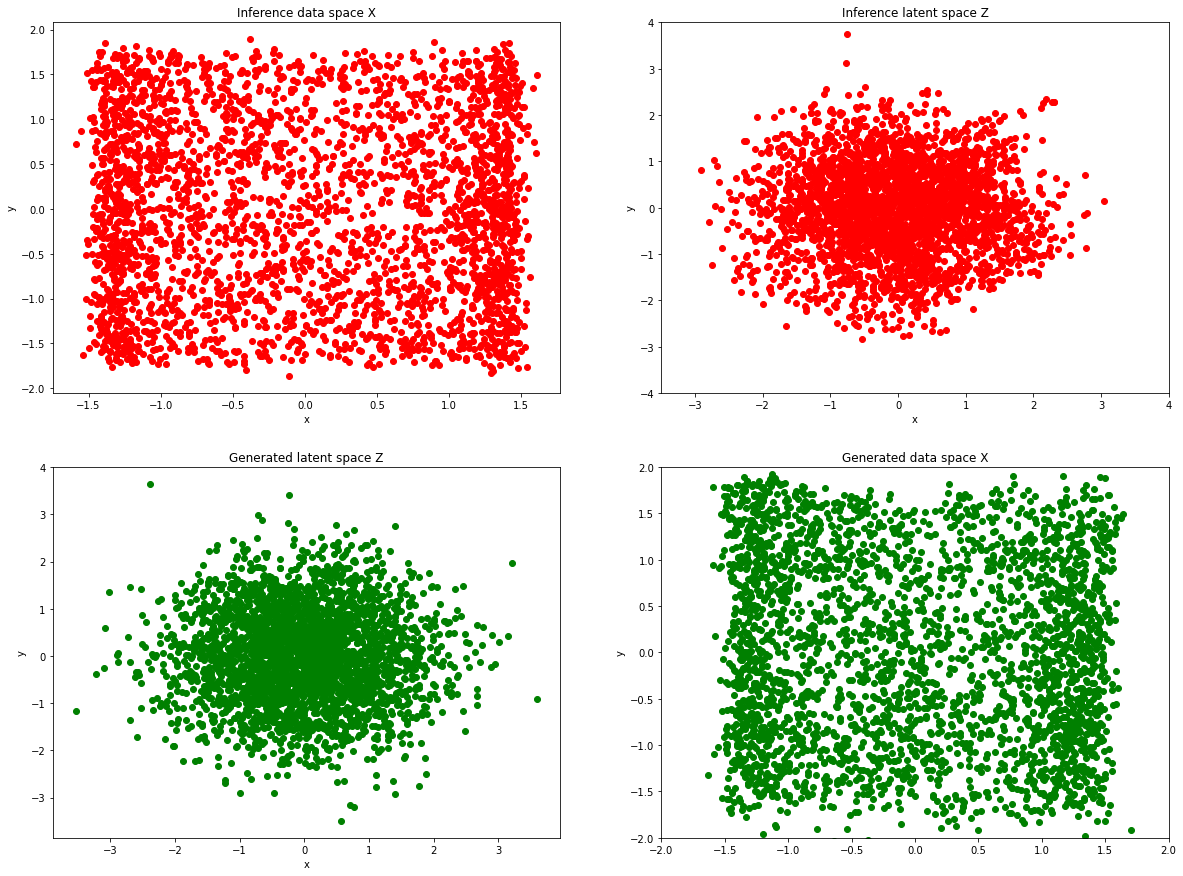

In [ ]:
# From data to latent space.
z, _ = model(normalized_data)

# From latent space to data.
samples = model.distribution.sample(3000)
x, _ = model.predict(samples)

f, axes = plt.subplots(2, 2)
f.set_size_inches(20, 15)

axes[0, 0].scatter(normalized_data[:, 0], normalized_data[:, 1], color="r")
axes[0, 0].set(title="Inference data space X", xlabel="x", ylabel="y")
axes[0, 1].scatter(z[:, 0], z[:, 1], color="r")
axes[0, 1].set(title="Inference latent space Z", xlabel="x", ylabel="y")
axes[0, 1].set_xlim([-3.5, 4])
axes[0, 1].set_ylim([-4, 4])
axes[1, 0].scatter(samples[:, 0], samples[:, 1], color="g")
axes[1, 0].set(title="Generated latent space Z", xlabel="x", ylabel="y")
axes[1, 1].scatter(x[:, 0], x[:, 1], color="g")
axes[1, 1].set(title="Generated data space X", label="x", ylabel="y")
axes[1, 1].set_xlim([-2, 2])
axes[1, 1].set_ylim([-2, 2])